# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

original_research_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
                        
# Display the data table for preview

original_research_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.

original_research_study_df['Mouse ID'].nunique()


249

In [3]:
# Checking duplicated 'Mouse ID' from all the data

duplicate_mouse_id = original_research_study_df[original_research_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

print(duplicate_mouse_id)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
587           45.000000                 0  
588           48.786801                 0  
589           47.570392        

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mouse_id_number = original_research_study_df[original_research_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

print(duplicate_mouse_id_number)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_timepoint_df = original_research_study_df[original_research_study_df['Mouse ID'].isin(duplicate_mouse_id_number)]

duplicate_mouse_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# using "keep=False" parameter to drop all duplicates from updated_research_study_df

updated_research_study_df = original_research_study_df[~original_research_study_df['Mouse ID'].isin(duplicate_mouse_id_number)]
updated_research_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# Checking the number of mice in the clean DataFrame.

updated_research_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_data = updated_research_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate each statistic separately
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_dev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()

# DataFrame to combine statistics
tumor_volume_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})


# Display the summary DataFrame
tumor_volume_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

tumor_volume_advanced_stats = updated_research_study_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_advanced_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

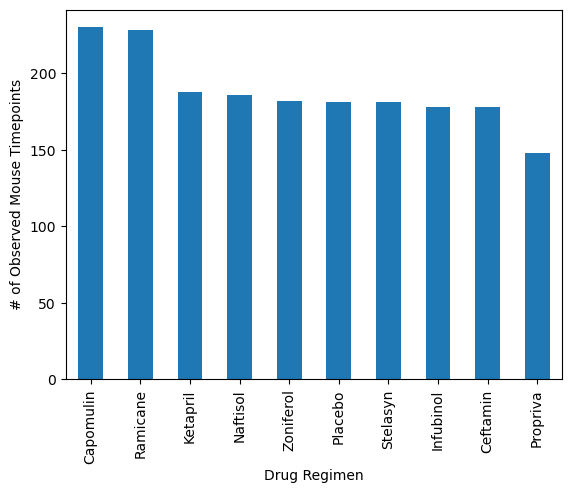

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# using pandas to create the chart requires less code.

bar_chart_pandas = updated_research_study_df['Drug Regimen'].value_counts()
bar_chart_pandas.plot(kind='bar', ylabel='# of Observed Mouse Timepoints', xlabel='Drug Regimen')
plt.show()


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64


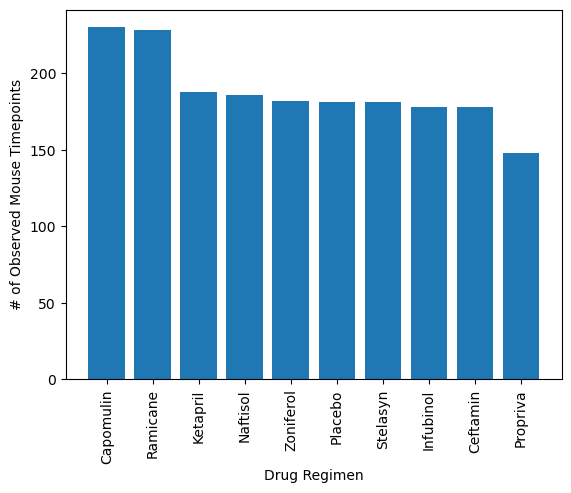

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Using pyplot the chart needs details requires more detials in the code 

bar_chart_pyplot = bar_chart_pandas.copy()
print(bar_chart_pyplot)
plt.bar(bar_chart_pyplot.index, bar_chart_pyplot.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()




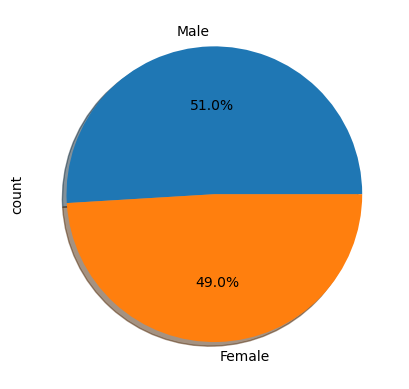

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

sex_pandas_pie_chart = updated_research_study_df['Sex'].value_counts()
                    
# Make the pie chart

sex_pandas_pie_chart.plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0])
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


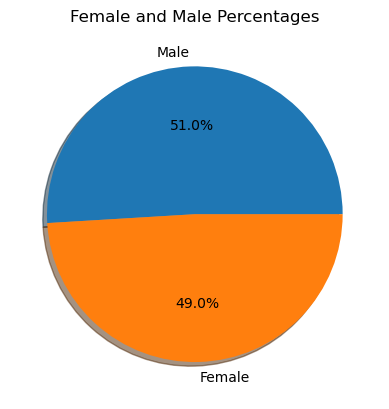

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

sex_pyplot_pie_chart = updated_research_study_df['Sex'].value_counts()

# Make the pie chart

print(sex_pyplot_pie_chart)
plt.pie(sex_pyplot_pie_chart, labels=sex_pyplot_pie_chart.index, autopct='%1.1f%%', shadow=True)
plt.title("Female and Male Percentages")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
updated_research_study_df['Timepoint'].value_counts()

Timepoint
0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: count, dtype: int64

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume = updated_research_study_df.loc[updated_research_study_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse

final_timepoint_per_mouse = updated_research_study_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_final_timepoint_df = pd.merge(final_timepoint_per_mouse, updated_research_study_df, on=['Mouse ID', 'Timepoint'], how='left')


merged_final_timepoint_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in drug_regimen:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    drug_data = merged_final_timepoint_df.loc[merged_final_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    

    # add subset

    tumor_volume.append(drug_data)

    # Calculate IQR

    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


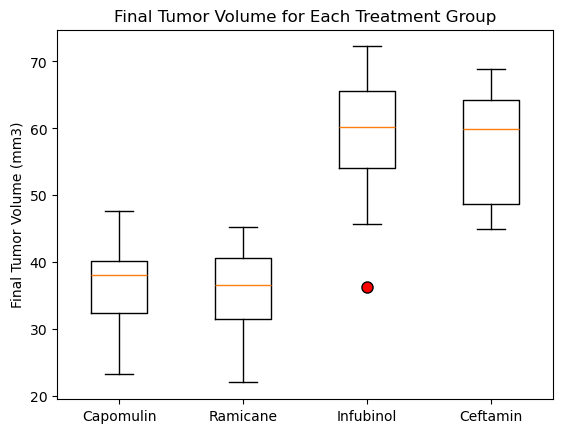

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Final Tumor Volume for Each Treatment Group')
plt.xticks(range(1,5), drug_regimen)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

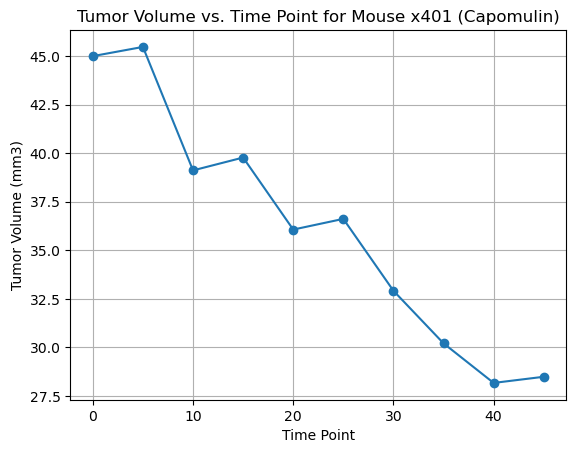

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter DataFrame for the Capomulin regimen with specific mouse ID
mouse_id = 'x401'
capomulin_data_line_chart = updated_research_study_df[(updated_research_study_df['Drug Regimen'] == 'Capomulin') & (updated_research_study_df['Mouse ID'] == mouse_id)]

# Plot tumor volume vs. time point for the mouse_id
plt.plot(capomulin_data_line_chart['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')

# plotting line chart 

plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Display the plot

plt.show()


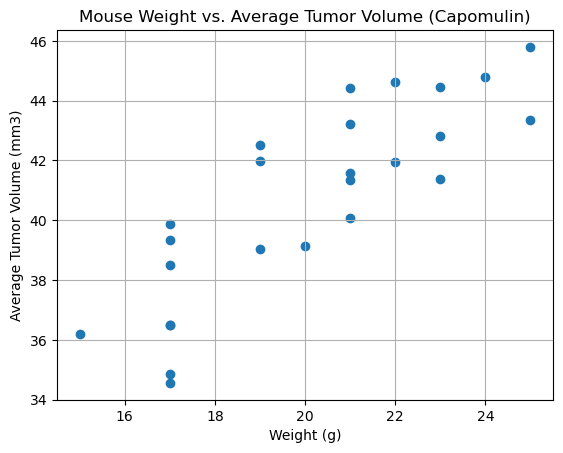

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter DataFrame for the Capomulin regimen
capomulin_data_scatter_plot = updated_research_study_df.loc[updated_research_study_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']]


# Calculate average tumor volume for each mouse treated with Capomulin
# Merge the average tumor volume with the mouse weights

avg_tumor_volume = capomulin_data_scatter_plot.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_data_scatter_plot[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')

# Add plot details
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Display the plot
plt.show()



## Correlation and Regression

Correlation coefficient: 0.84


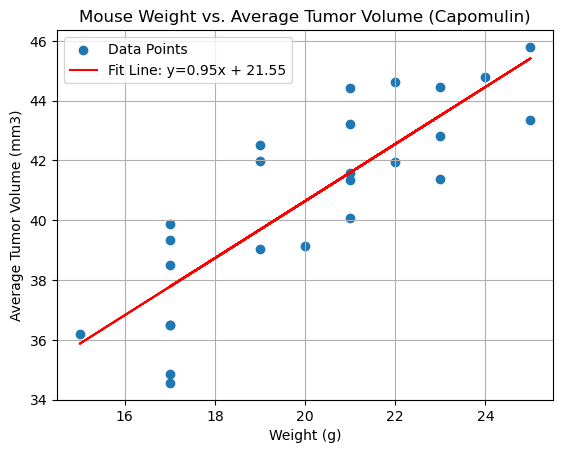

In [45]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation coefficient
correlation_coef, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation_coef:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Calculate the regression line
regress_values = merged_data['Weight (g)'] * slope + intercept

# Plot scatter plot and regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', label='Data Points')
plt.plot(merged_data['Weight (g)'], regress_values, color='red', label=f'Fit Line: y={slope:.2f}x + {intercept:.2f}')

# Add plot details
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
